In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

ay = pd.read_csv('hf://datasets/lukebarousse/data_jobs/data_jobs.csv')

ay['job_posted_date'] = pd.to_datetime (ay['job_posted_date'])

ay['job_skills']= ay['job_skills'].apply(lambda skill_list: 
                                         ast.literal_eval(skill_list) 
                                         if pd.notna (skill_list) else skill_list)

c:\Users\EMMANUEL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
ay_DA_US = ay[(ay['job_country']== 'United States') & (ay['job_title_short']=='Data Analyst')]

ay_DA_US.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
556016,Data Analyst,Business Data Analyst,"Ohio, IL",via Dice.com,Full-time,False,"Illinois, United States",2023-05-02 19:02:40,True,False,United States,year,70000.0,NaN,"Acadia Technologies, Inc.","[matlab, r, python, sql, nosql]","{'programming': ['matlab', 'r', 'python', 'sql..."
143158,Data Analyst,Business Data Analyst,"Lake Mary, FL",via BeBee,Full-time,False,"Florida, United States",2023-06-21 08:02:26,False,False,United States,NaN,NaN,NaN,LanceSoft,"[sql, flow]","{'other': ['flow'], 'programming': ['sql']}"
188711,Data Analyst,Junior Analyst – Reporting & Analytics,"Baltimore, MD",via LinkedIn,Full-time,False,"New York, United States",2023-12-19 15:01:04,False,True,United States,NaN,NaN,NaN,StepStone Group,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
454850,Data Analyst,"Data Analyst III-locals____________orlando,FL","Orlando, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-11-03 14:01:44,False,False,United States,NaN,NaN,NaN,Steneral Consulting,"[sql, oracle, jira]","{'async': ['jira'], 'cloud': ['oracle'], 'prog..."
635228,Data Analyst,Digital Marketing Analyst (Remote) - Now Hiring,"Lake Forest, IL",via Snagajob,Full-time,False,"Illinois, United States",2023-09-04 12:02:10,True,True,United States,hour,NaN,37.0,Cella,"[python, sql]","{'programming': ['python', 'sql']}"


In [10]:
ay_DA_US['job_location'].value_counts().head(10).to_frame()

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


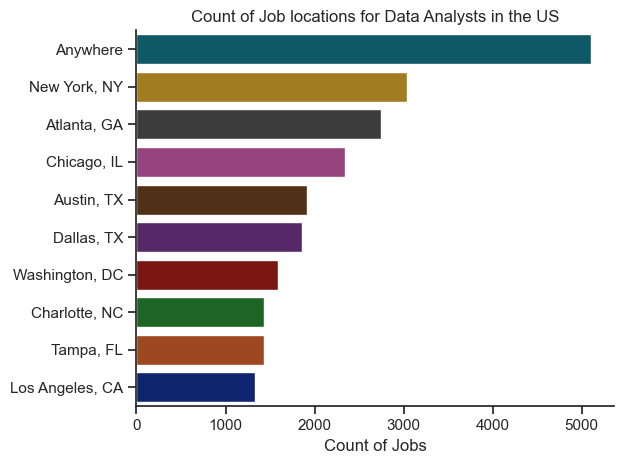

In [39]:
ay_plot = ay_DA_US['job_location'].value_counts().head(10).to_frame()

sns.barplot(
    data= ay_plot, 
    x='count', 
    y='job_location',
    hue='count',
    palette='dark', #OR 'bright'
    legend=False
    )
sns.set_theme(style='ticks')
sns.despine()

plt.xlabel ('Count of Jobs')
plt.ylabel ('')
plt.title ('Count of Job locations for Data Analysts in the US')
plt.tight_layout ()
plt.show()

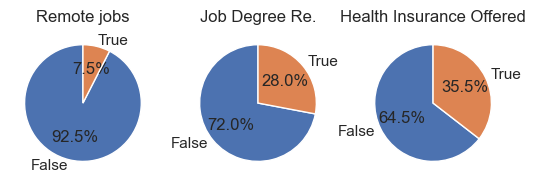

In [ ]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home':'Remote jobs',
    'job_no_degree_mention':'Job Degree Re.',
    'job_health_insurance':'Health Insurance Offered'
}

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(
        ay_DA_US[column].value_counts(), 
        labels= (['False', 'True']), 
        startangle= 90, 
        autopct='%1.1f%%'
        )
    ax[i].set_title (title)

plt.show()

In [41]:
ay_DA_US['company_name'].value_counts().head(10).to_frame()

,count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
Citi,477
Corporate,416
SynergisticIT,374
Centene Corporation,350


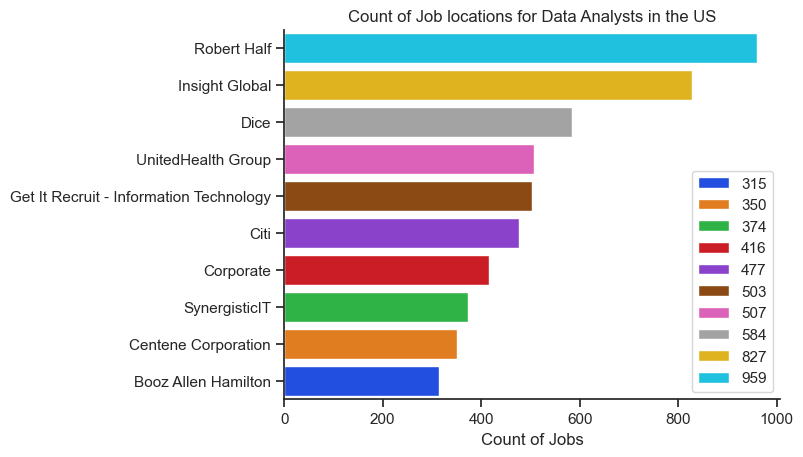

In [43]:
ay_cy_plot = ay_DA_US['company_name'].value_counts().head(10).to_frame()

sns.barplot(
    data= ay_cy_plot, 
    x='count', 
    y='company_name',
    hue='count',
    palette='bright'
    )
sns.set_theme(style='ticks')
sns.despine()

plt.xlabel ('Count of Jobs')
plt.ylabel ('')
plt.title ('Count of Job locations for Data Analysts in the US')
plt.legend()
plt.show()